# Final Project

## Resul KAYIM

# Data

In [330]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [331]:
# Read csv
data = pd.read_csv('diamonds.csv')
data

,index,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,Very Low
1,2,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,Very Low
2,3,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,Very Low
3,4,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,Very Low
4,5,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,Very Low
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50,Very Low
53936,53937,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61,Very Low
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56,Very Low
53938,53939,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74,Very Low


In [332]:
# Describe our data for each feature and use .info() for get information about our dataset
# Analyse missing values

In [333]:
#Getting information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   index    53940 non-null  int64  
 1   carat    53940 non-null  float64
 2   cut      53940 non-null  object 
 3   color    53940 non-null  object 
 4   clarity  53940 non-null  object 
 5   depth    53940 non-null  float64
 6   table    53940 non-null  float64
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
 10  price    53940 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 4.5+ MB


##### Data has integer, float and categorical values.

In [334]:
print(f"Sum of missing values : {data.isna().sum().sum()}")
data.isna().sum()

Sum of missing values : 0


index      0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

# Exploratory Data Analysis

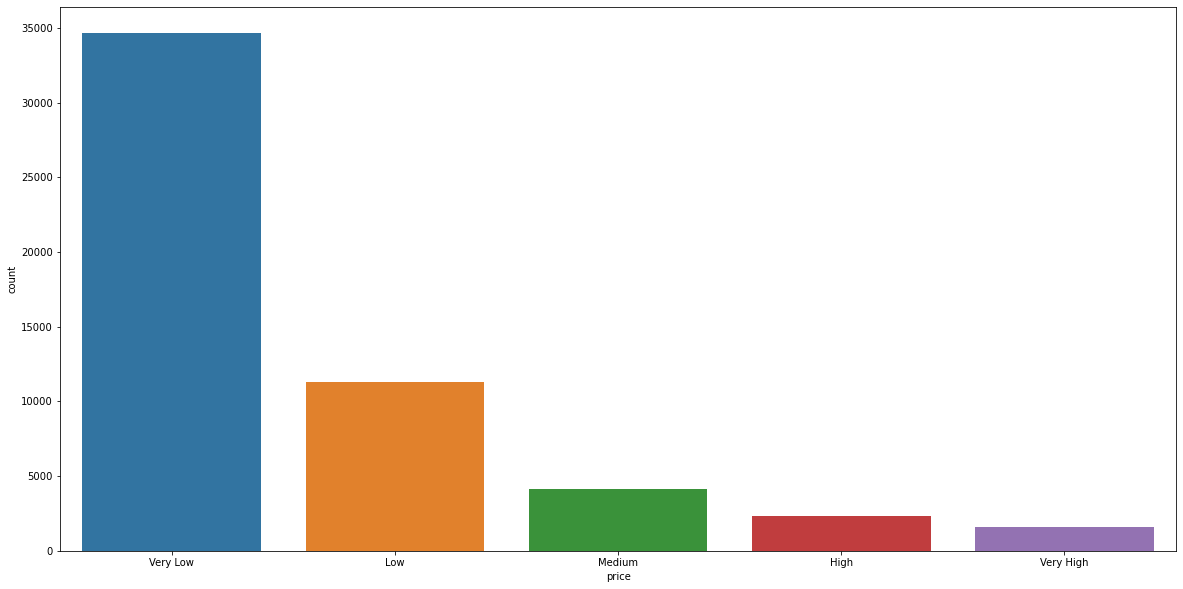

In [335]:
sns.countplot(x ='price', data = data)

In [336]:
data['price'].unique()

array(['Very Low', 'Low', 'Medium', 'High', 'Very High'], dtype=object)

#### Target variable / Dependent variable is categorical and ordinal values. Count of each price is in descending order. Therefore, our dataset is not balanced so we connot use accuracy as metric.

In [337]:
#Describing
data.describe()

,index,carat,depth,table,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,10.740000,58.900000,31.800000


##### In the first look on description, i can say that there is notably a large difference between 75th percentile and max values of predictors “table”,”y” and ”z”. There are extreme values-Outliers in our data set.

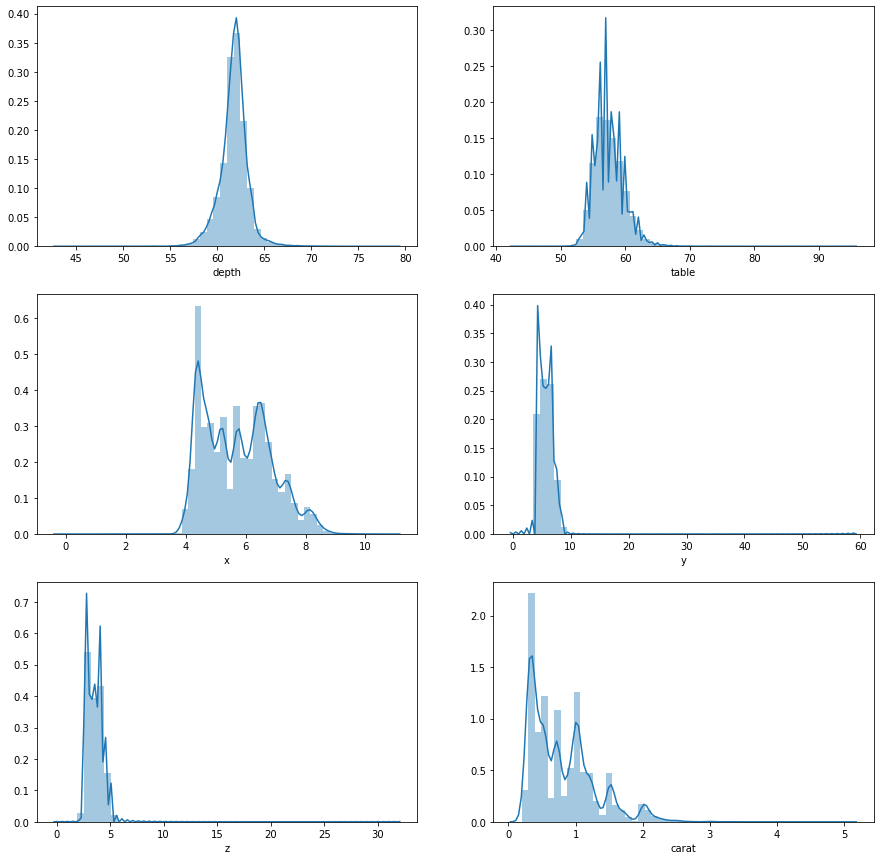

In [338]:
# EDA (distplot) for continuous features

fig,a =  plt.subplots(3,2)
fig.set_figheight(15)
fig.set_figwidth(15)
for i, column in enumerate(data.describe().columns):
    if column == 'index':
        continue
    sns.distplot(data[column], ax=a[i//2-1, i%2])
    a[i//2-1, i%2].set_xlabel(str(column))

### Depth and table column appears to be normally disributd.Remainin independent continious variables positively skewed. And as i sad before, in table, y, and z column there are some noisy data.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001768D08A7C0>,
      dtype=object)

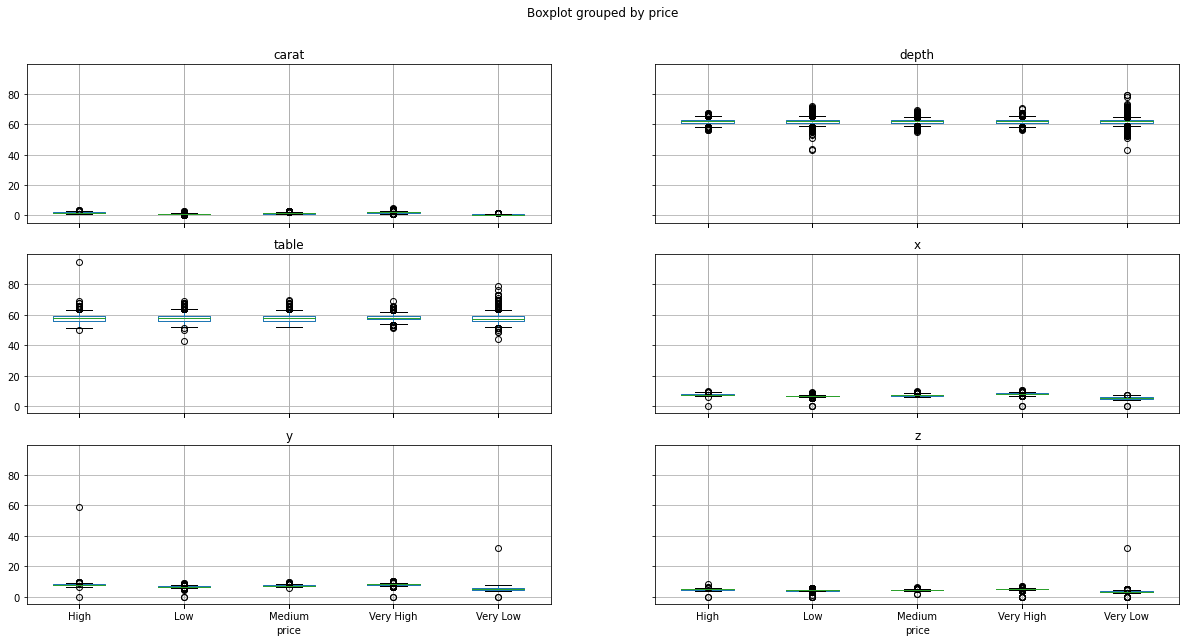

In [339]:
#Box Plot Graph
data.boxplot(by='price', column=['carat', 'depth', 'table', 'x', 'y', 'z'], grid=True)

### Again we see in the above graph there are some noisy data

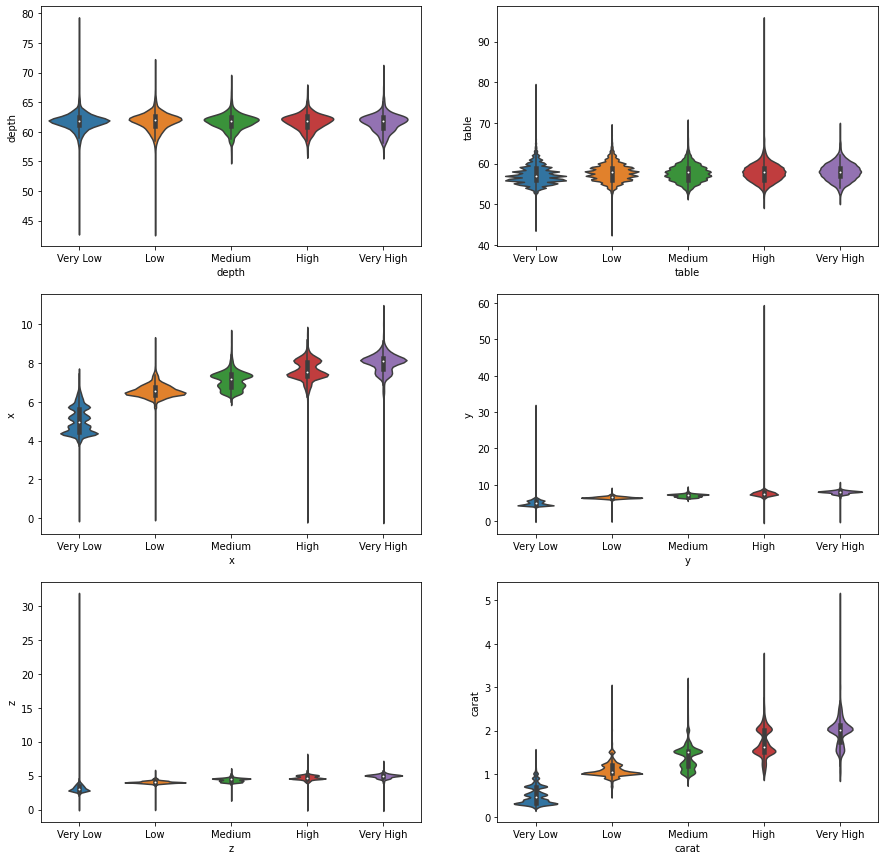

In [340]:
#Violin Graph
fig,a =  plt.subplots(3,2)
fig.set_figheight(15)
fig.set_figwidth(15)
for i, column in enumerate(data.describe().columns):
    if column == 'index':
        continue
    sns.violinplot(x='price', y=column, data=data, ax=a[i//2-1, i%2])
    a[i//2-1, i%2].set_xlabel(str(column))

    

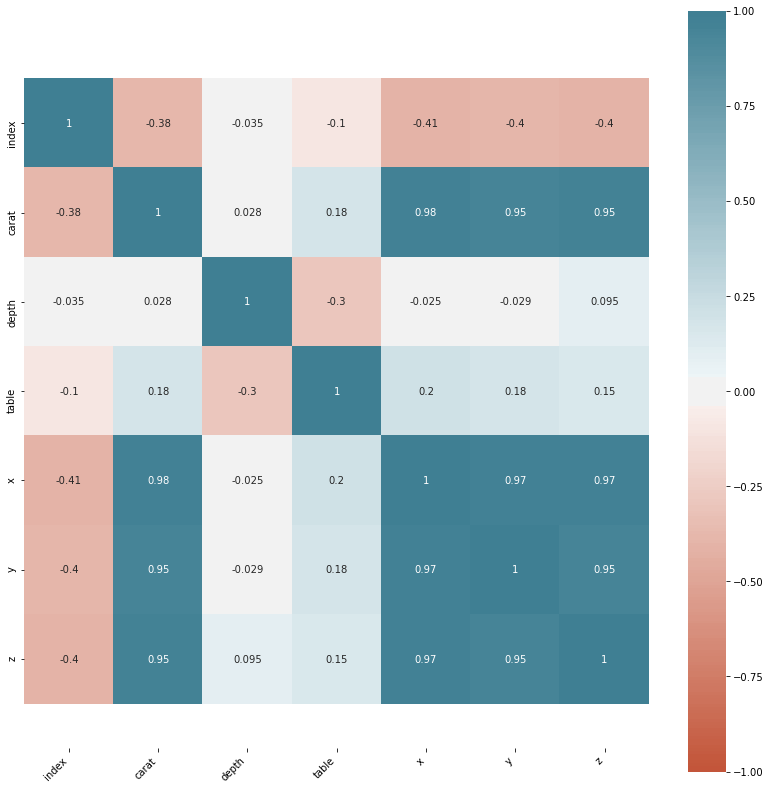

In [341]:
#Correlation of the features
corr = data.corr()

plt.figure(figsize=(14, 14))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_ylim(len(corr)+0.5, -0.5);

# Preprocessing

- Are there any duplicated values?
- Do we need to do feature scaling?
- Do we need to generate new features?
- Split dataset into train and test sets. (0.7/0.3)

### There is no duplicated value

In [342]:
#Cleaning duplicate values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   index    53940 non-null  int64  
 1   carat    53940 non-null  float64
 2   cut      53940 non-null  object 
 3   color    53940 non-null  object 
 4   clarity  53940 non-null  object 
 5   depth    53940 non-null  float64
 6   table    53940 non-null  float64
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
 10  price    53940 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 4.5+ MB


In [343]:
data.duplicated().sum()

0

In [344]:
# Outlier Detection
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(data.loc[:, data.describe().columns]))
z

array([[1.7320187 , 1.19816781, 0.17409151, ..., 1.58783745, 1.53619556,
        1.57112919],
       [1.73195448, 1.24036129, 1.36073849, ..., 1.64132529, 1.65877419,
        1.74117497],
       [1.73189025, 1.19816781, 3.38501862, ..., 1.49869105, 1.45739502,
        1.74117497],
       ...,
       [1.73189025, 0.20662095, 0.73334442, ..., 0.06343409, 0.04774083,
        0.03013526],
       [1.73195448, 0.13092691, 0.52310533, ..., 0.37338325, 0.33750627,
        0.28520393],
       [1.7320187 , 0.10113725, 0.31452784, ..., 0.08811478, 0.11861587,
        0.14349912]])

In [345]:
outliers = list(set(np.where(z > 3)[0]))
len(outliers)

1388

In [346]:
new_data = data.drop(outliers,axis = 0).reset_index(drop = False)
display(new_data)

,level_0,index,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,Very Low
1,1,2,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,Very Low
2,3,4,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,Very Low
3,4,5,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,Very Low
4,5,6,0.24,Very Good,J,VVS2,62.8,57.0,3.94,3.96,2.48,Very Low
...,...,...,...,...,...,...,...,...,...,...,...,...
52547,53935,53936,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50,Very Low
52548,53936,53937,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61,Very Low
52549,53937,53938,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56,Very Low
52550,53938,53939,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74,Very Low


Now we have some categorical values we have to convert them. Cut is ordinal so i labelled values only, but for color and clarity which are nominal values i use get_dummies(like one-hot-encoding). And also output column that is price will be labelled.

In [347]:
#Splitting data into input and output
y = new_data.iloc[:,-1]
X = new_data.iloc[:,1:-1] # Also index column is dropped

In [348]:
y.unique() # it is ordinal

array(['Very Low', 'Low', 'Medium', 'High', 'Very High'], dtype=object)

In [349]:
#Copy original data into new DataFrame and process
from sklearn.preprocessing import LabelEncoder

new_X = X.copy()
new_X['cut'] = new_X['cut'].map({'Fair':1, 'Good': 2, 'Very Good': 3, 'Premium':4, 'Ideal':5})
new_X = pd.get_dummies(data = new_X, columns = ['color','clarity'])

encoder = LabelEncoder()
y = encoder.fit_transform(y)
categories = encoder.inverse_transform([0,1,2,3,4])

new_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52552 entries, 0 to 52551
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         52552 non-null  int64  
 1   carat         52552 non-null  float64
 2   cut           52552 non-null  int64  
 3   depth         52552 non-null  float64
 4   table         52552 non-null  float64
 5   x             52552 non-null  float64
 6   y             52552 non-null  float64
 7   z             52552 non-null  float64
 8   color_D       52552 non-null  uint8  
 9   color_E       52552 non-null  uint8  
 10  color_F       52552 non-null  uint8  
 11  color_G       52552 non-null  uint8  
 12  color_H       52552 non-null  uint8  
 13  color_I       52552 non-null  uint8  
 14  color_J       52552 non-null  uint8  
 15  clarity_I1    52552 non-null  uint8  
 16  clarity_IF    52552 non-null  uint8  
 17  clarity_SI1   52552 non-null  uint8  
 18  clarity_SI2   52552 non-nu

#### For decision tree model which i will create, feature scaling is not necessary. However, beside decision tree i will create two model by using KNN and SVM so for these algorithm feature scaling is essential and it makes better accuracy.
#### Now firstly i will split our data and then scale our dataset but i won't use scaled data for decision tree.

In [350]:
# Splitting data as train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(new_X, y, test_size = 0.3, random_state=42)
print(f"Number of training examples : {X_train.shape[0]}, Number of test examples : {X_test.shape[0]}")

Number of training examples : 36786, Number of test examples : 15766


In [351]:
#Standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ML Application

- Define models.
- Fit models.
- Evaluate models for both train and test dataset.
- Generate Confusion Matrix and scores of Accuracy, Recall, Precision and F1-Score.
- Analyse occurrence of overfitting and underfitting. If there is any of them, try to overcome it within a different section.

In [352]:
#Loading of necassary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [354]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, f1_score

def create_cm(y_test, pred):
    cm = confusion_matrix(y_test, pred)
    plt.figure(figsize=(12, 8))
    ax =sns.heatmap(cm, square=True, annot=True, cbar=False, fmt='g')
    ax.xaxis.set_ticklabels(categories, fontsize = 12)
    ax.yaxis.set_ticklabels(categories, fontsize = 12, rotation=0)
    ax.set_xlabel('Predicted Labels',fontsize = 15)
    ax.set_ylabel('True Labels',fontsize = 15)

### Decision Tree

Accuracy of train: 1.0
Accuracy of test: 0.9997462894836991

Bias for training: 0.0
Bias for test: 0.0002537105163008535

Variance: 0.0002537105163008535





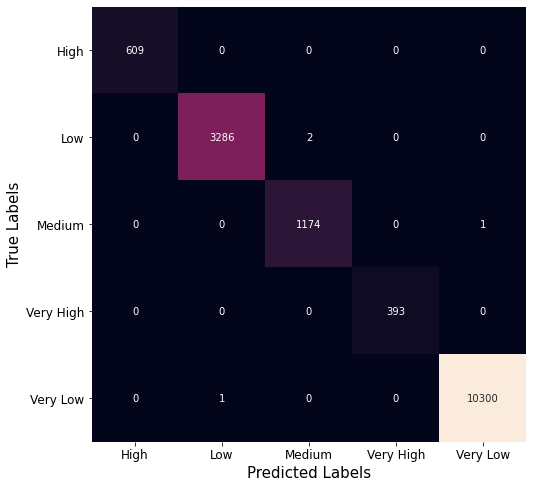

In [361]:
# Decision Tree model creation
dec_tree = DecisionTreeClassifier(max_depth=10, random_state=42)
dec_tree.fit(X_train,y_train)
train_score = dec_tree.score(X_train,y_train)
test_score = dec_tree.score(X_test,y_test)

print("Accuracy of train:",train_score)
print("Accuracy of test:",test_score)
print("\nBias for training:",1-train_score)
print("Bias for test:",1-test_score)
print("\nVariance:",(1-test_score)-(1-train_score))
print("\n\n")

pred = dec_tree.predict(X_test)
create_cm(y_test, pred)

In [362]:
print(classification_report(y_test,pred))
print("Precision = {}".format(precision_score(y_test, pred, average='macro')))
print("Recall = {}".format(recall_score(y_test, pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, pred)))
print("F1 Score = {}".format(f1_score(y_test, pred,average='macro')))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       609
           1       1.00      1.00      1.00      3288
           2       1.00      1.00      1.00      1175
           3       1.00      1.00      1.00       393
           4       1.00      1.00      1.00     10301

    accuracy                           1.00     15766
   macro avg       1.00      1.00      1.00     15766
weighted avg       1.00      1.00      1.00     15766

Precision = 0.9995796025988504
Recall = 0.9996887171421067
Accuracy = 0.9997462894836991
F1 Score = 0.9996341191077264


### KNN Classification

Accuracy of train: 0.9587614853476866
Accuracy of test: 0.9091716351642776

Bias for training: 0.04123851465231343
Bias for test: 0.09082836483572243

Variance: 0.049589850183409





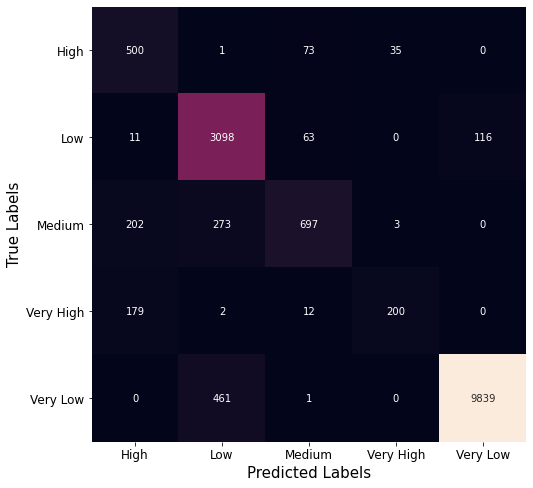

In [365]:
#KNN Classification model creation
knn = KNeighborsClassifier(n_neighbors=2, n_jobs=-1)
knn.fit(X_train_scaled, y_train)
train_score = knn.score(X_train_scaled,y_train)
test_score = knn.score(X_test_scaled,y_test)
print("Accuracy of train:",train_score)
print("Accuracy of test:",test_score)
print("\nBias for training:",1-train_score)
print("Bias for test:",1-test_score)
print("\nVariance:",(1-test_score)-(1-train_score))
print("\n\n")

pred = knn.predict(X_test_scaled)
create_cm(y_test, pred)

In [366]:
print(classification_report(y_test,pred))
print("Precision = {}".format(precision_score(y_test, pred, average='macro')))
print("Recall = {}".format(recall_score(y_test, pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, pred)))
print("F1 Score = {}".format(f1_score(y_test, pred,average='macro')))

              precision    recall  f1-score   support

           0       0.56      0.82      0.67       609
           1       0.81      0.94      0.87      3288
           2       0.82      0.59      0.69      1175
           3       0.84      0.51      0.63       393
           4       0.99      0.96      0.97     10301

    accuracy                           0.91     15766
   macro avg       0.80      0.76      0.77     15766
weighted avg       0.92      0.91      0.91     15766

Precision = 0.8041843138861179
Recall = 0.7640959003073652
Accuracy = 0.9091716351642776
F1 Score = 0.7662435872643014


### SVM Classification

Accuracy of train: 0.9705050834556624
Accuracy of test: 0.9625142712165419

Bias for training: 0.029494916544337557
Bias for test: 0.03748572878345813

Variance: 0.00799081223912057





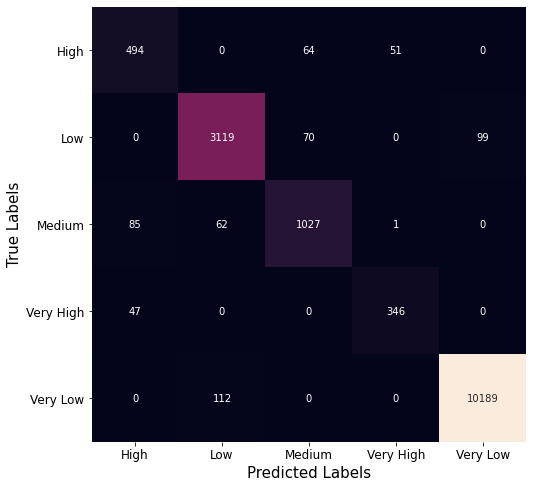

In [371]:
# SVM Classification model creation
svm = SVC(C=5, kernel='rbf')
svm.fit(X_train_scaled, y_train)
train_score = svm.score(X_train_scaled,y_train)
test_score = svm.score(X_test_scaled,y_test)
print("Accuracy of train:",train_score)
print("Accuracy of test:",test_score)
print("\nBias for training:",1-train_score)
print("Bias for test:",1-test_score)
print("\nVariance:",(1-test_score)-(1-train_score))
print("\n\n")

pred = svm.predict(X_test_scaled)
create_cm(y_test, pred)

In [372]:
print(classification_report(y_test,pred))
print("Precision = {}".format(precision_score(y_test, pred, average='macro')))
print("Recall = {}".format(recall_score(y_test, pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, pred)))
print("F1 Score = {}".format(f1_score(y_test, pred,average='macro')))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80       609
           1       0.95      0.95      0.95      3288
           2       0.88      0.87      0.88      1175
           3       0.87      0.88      0.87       393
           4       0.99      0.99      0.99     10301

    accuracy                           0.96     15766
   macro avg       0.90      0.90      0.90     15766
weighted avg       0.96      0.96      0.96     15766

Precision = 0.8961208305477717
Recall = 0.9006687531910404
Accuracy = 0.9625142712165419
F1 Score = 0.8983509729363768


# Evaluation

Because of unbalance dataset, i don't use accuracy as evaluation metric. And also i want to sure about truth of predicted price so i decided to use precision for evaluation of models. According to precision value best model for this dataset decision tree model.Besides, training elapsed time is minimum at decision tree models. For sure better performance may be accepted from svm and knn models by using different parameters but i think decision tree is the best between these algorithms in this dataset.

I ran algorithms before eliminating noisy examples. Performance was 10% worse than eliminated version. We could see these noisy data at EDA step by using some method and then z-score technique indicated these ones and i dropped them from our dataset